In [1]:
import pandas as pd
df=pd.read_csv('sample_data/mnist_train_small.csv',header=None)
X=df.iloc[:,1:].values/255.0
y=df.iloc[:,0].values

In [3]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Input

In [17]:
in_layer=Input(shape=(784,))
h1=Dense(400,activation='relu')(in_layer)
h2=Dense(200,activation='tanh')(h1)
out_layer=Dense(10,activation='softmax')(h2)

In [11]:
h22=Dense(100,activation='relu')(h1)
out_layer22=Dense(10,activation='softmax')(h22)

In [6]:
model1=Model(inputs=in_layer,outputs=out_layer)
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(X,y,epochs=10,validation_split=.1)

Epoch 1/10
563/563 [==============================] - 2s 4ms/step - loss: 0.2969 - accuracy: 0.9108 - val_loss: 0.1990 - val_accuracy: 0.9360
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1196 - accuracy: 0.9622 - val_loss: 0.1736 - val_accuracy: 0.9470
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0693 - accuracy: 0.9787 - val_loss: 0.1270 - val_accuracy: 0.9615
Epoch 4/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0489 - accuracy: 0.9841 - val_loss: 0.1422 - val_accuracy: 0.9595
Epoch 5/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.1503 - val_accuracy: 0.9600
Epoch 6/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.1390 - val_accuracy: 0.9645
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.1458 - val_accuracy: 0.9635
Epoch 

In [12]:
model2=Model(inputs=in_layer,outputs=out_layer22)
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(X,y,epochs=10,validation_split=.1)

Epoch 1/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0966 - accuracy: 0.9740 - val_loss: 0.1300 - val_accuracy: 0.9685
Epoch 2/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.1424 - val_accuracy: 0.9700
Epoch 3/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1392 - val_accuracy: 0.9705
Epoch 4/10
563/563 [==============================] - 2s 3ms/step - loss: 4.6814e-04 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 0.9700
Epoch 5/10
563/563 [==============================] - 2s 3ms/step - loss: 1.8411e-04 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 0.9710
Epoch 6/10
563/563 [==============================] - 2s 3ms/step - loss: 1.0995e-04 - accuracy: 1.0000 - val_loss: 0.1475 - val_accuracy: 0.9710
Epoch 7/10
563/563 [==============================] - 2s 3ms/step - loss: 7.5750e-05 - accuracy: 1.0000 - val_loss: 0.1518 - val_accurac

In [10]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [18]:
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [72]:
df_iris=pd.read_csv('/content/drive/My Drive/dataset_dl/classification/iris.csv')
df_online=pd.read_csv('/content/drive/My Drive/dataset_dl/classification/online_shop.csv')
df_online.Gender=df_online.Gender.map({'Female':0,"Male":1})

X1=df_iris.iloc[:,:-1].values
y1=df_iris.iloc[:,-1].values


X2=df_online.iloc[:150,:-1].values
y2=df_online.iloc[:150,-1].values



In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1_new=sc.fit_transform(X1)
X2_new=sc.fit_transform(X2)

In [74]:
X1_new.shape

(150, 4)

In [75]:
X2_new.shape

(150, 3)

In [76]:
in1=Input(shape=(X1_new.shape[1],))
in2=Input(shape=(X2_new.shape[1],))

In [77]:
from tensorflow.keras.layers import concatenate

In [78]:
merge=concatenate([in1,in2])
h1=Dense(10,activation='relu')(merge)
out1=Dense(3,activation='softmax',name="iris_out")(h1)
out2=Dense(1,activation='sigmoid',name="online_out")(h1)

model=Model(inputs=[in1,in2],outputs=[out1,out2])

In [79]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 3)]          0                                            
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 7)            0           input_9[0][0]                    
                                                                 input_10[0][0]                   
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 10)           80          concatenate_5[0][0]        

In [80]:
from tensorflow.keras.utils import plot_model

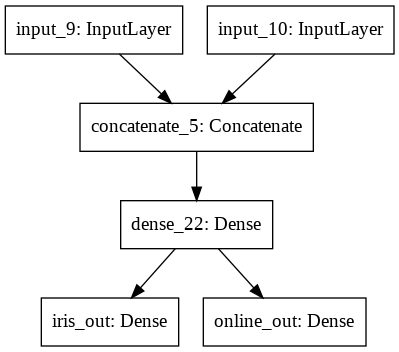

In [81]:
plot_model(model)

In [82]:
#model.compile(loss={'iris_out':'sparse_categorical_crossentropy','online_out':'binary_crossentropy'},optimizer="adam",metrics=['accuracy'])
model.compile(loss=['sparse_categorical_crossentropy','binary_crossentropy'],optimizer="adam",metrics=['accuracy'])

In [83]:
model.fit([X1_new,X2_new],[y1,y2],epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 2.1725 - iris_out_loss: 1.3953 - online_out_loss: 0.7773 - iris_out_accuracy: 0.3800 - online_out_accuracy: 0.5333
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 2.1298 - iris_out_loss: 1.3695 - online_out_loss: 0.7603 - iris_out_accuracy: 0.3800 - online_out_accuracy: 0.5400
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 2.0891 - iris_out_loss: 1.3460 - online_out_loss: 0.7430 - iris_out_accuracy: 0.3800 - online_out_accuracy: 0.5600
Epoch 4/50
5/5 [==============================] - 0s 1ms/step - loss: 2.0474 - iris_out_loss: 1.3220 - online_out_loss: 0.7254 - iris_out_accuracy: 0.3867 - online_out_accuracy: 0.5600
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 2.0112 - iris_out_loss: 1.3009 - online_out_loss: 0.7103 - iris_out_accuracy: 0.3933 - online_out_accuracy: 0.5667
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 1.976

In [84]:
from tensorflow.keras.datasets import fashion_mnist

In [86]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [87]:
X_train.shape

(60000, 28, 28)

In [88]:
y_train.shape

(60000,)

In [89]:
X_test.shape

(10000, 28, 28)